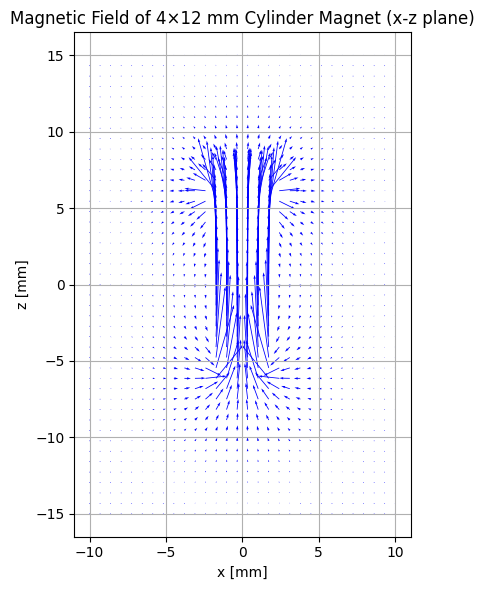

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# 1. Define the cylindrical magnet (4 mm diameter, 12 mm height)
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, 1e5),  # A/m along z
    dimension=(4, 12)  # diameter=4mm, height=12mm
)

# 2. Create a grid of points in the x-z plane (y=0)
x = np.linspace(-10, 10, 30)  # mm
z = np.linspace(-15, 15, 45)  # mm
X, Z = np.meshgrid(x, z)
positions = np.stack((X.ravel(), np.zeros_like(X.ravel()), Z.ravel()), axis=1)

# 3. Compute B field at those positions
B = magnet.getB(positions)  # in mT
Bx = B[:, 0].reshape(X.shape)
Bz = B[:, 2].reshape(Z.shape)

# 4. Plot using quiver
plt.figure(figsize=(8, 6))
plt.quiver(X, Z, Bx, Bz, scale=0.5, color='blue')
plt.title('Magnetic Field of 4×12 mm Cylinder Magnet (x-z plane)')
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

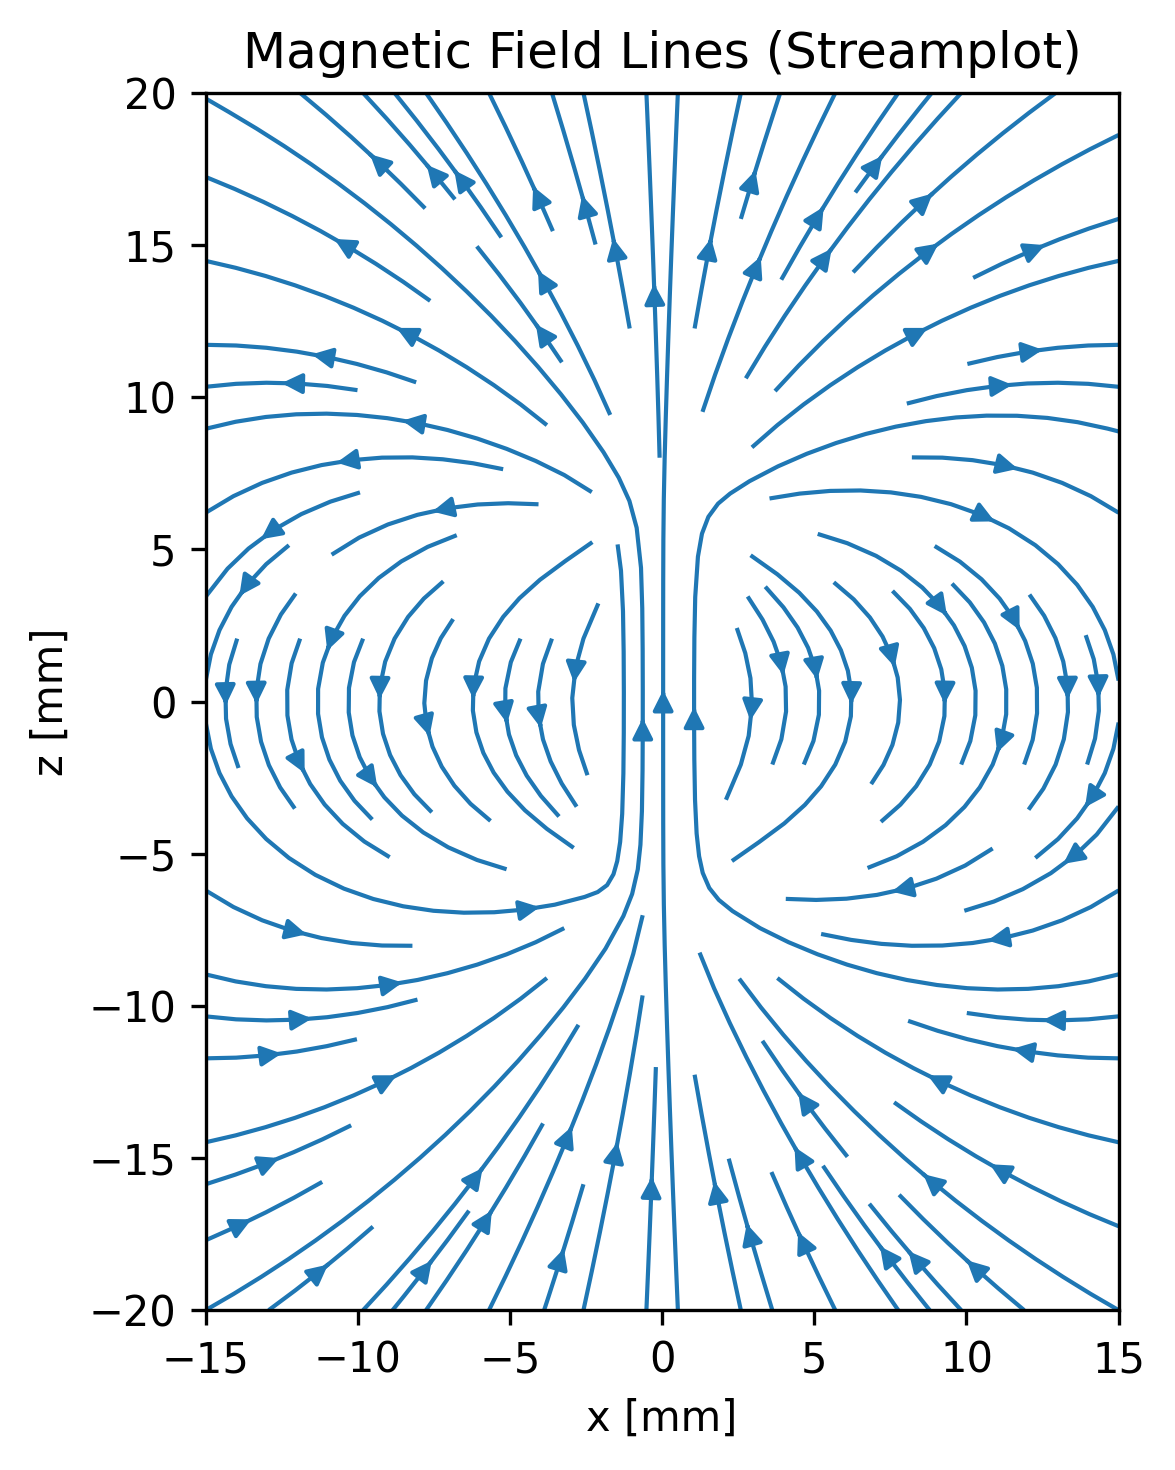

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Define magnet: 4 mm diameter, 12 mm height, magnetized along z
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, 1e5),  # A/m
    dimension=(4, 12)  # diameter, height in mm
)

# Create a grid in the x-z plane (y = 0)
x = np.linspace(-15, 15, 3000)
z = np.linspace(-20, 20, 4000)
X, Z = np.meshgrid(x, z)
positions = np.stack((X.ravel(), np.zeros_like(X.ravel()), Z.ravel()), axis=1)

# Get B field
B = magnet.getB(positions)
Bx = B[:, 0].reshape(X.shape)
Bz = B[:, 2].reshape(Z.shape)

# Plot field lines
plt.figure(figsize=(8, 5), dpi=300)
plt.streamplot(X, Z, Bx, Bz, color='C0', linewidth=1)
plt.title('Magnetic Field Lines (Streamplot)')
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.gca().set_aspect('equal')
# plt.grid(True)
plt.tight_layout()
plt.show()

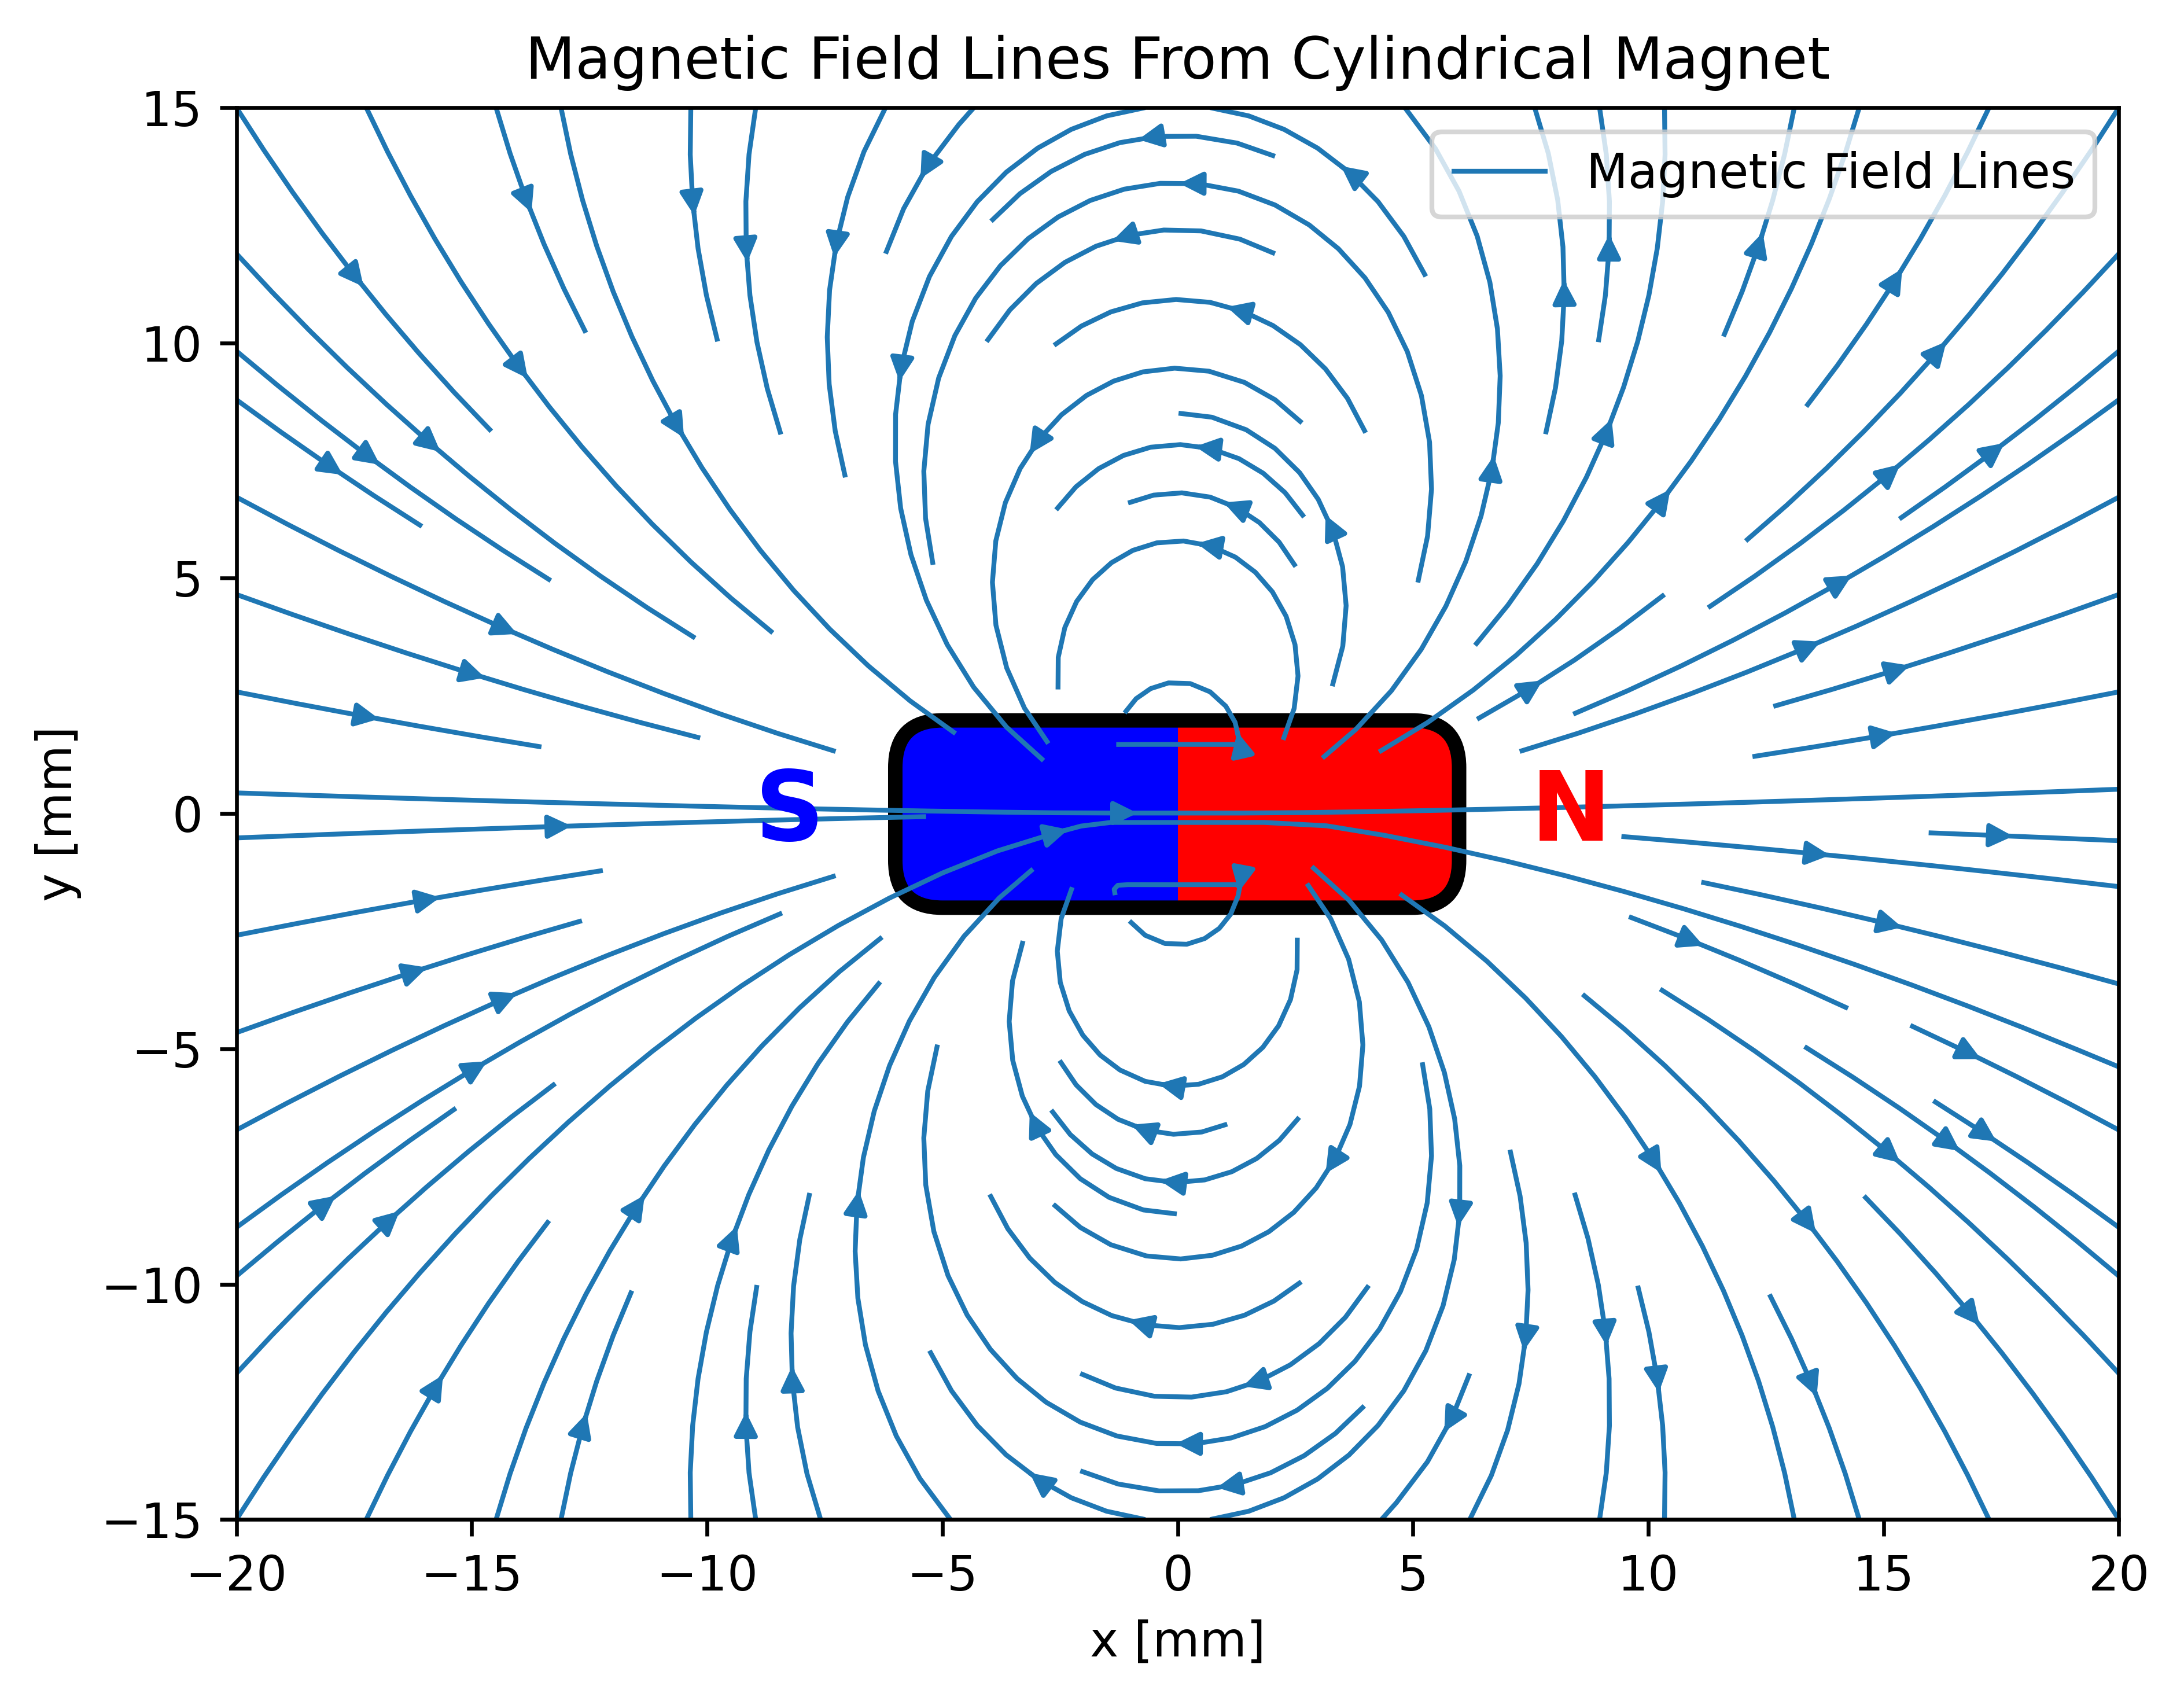

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag
from matplotlib.patches import FancyBboxPatch, Rectangle

# Define magnet: 4 mm diameter, 12 mm length (horizontal now, so treat height as x-length)
diameter = 4  # mm (vertical thickness)
length = 12   # mm (horizontal length)
magnet = mag.magnet.Cylinder(
    magnetization=(1e5, 0, 0),  # Along x now
    dimension=(diameter, length)
)

# Create grid in y-x plane (horizontal), with magnet centered at (0,0)
x = np.linspace(-20, 20, 1600)
y = np.linspace(-15, 15, 1200)
X, Y = np.meshgrid(x, y)
positions = np.stack((X.ravel(), Y.ravel(), np.zeros_like(X.ravel())), axis=1)  # z=0

# Get B field
B = magnet.getB(positions)
Bx = B[:, 0].reshape(X.shape)
By = B[:, 1].reshape(Y.shape)

# Plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=600)
ax.streamplot(X, Y, Bx, By, color='C0', linewidth=1, density=1.0)

# Magnet parameters
corner_radius = 1
inset = 0.15  # amount to inset the colored rectangles to avoid overlap

# Outer rounded magnet outline
magnet_outline = FancyBboxPatch(
    (-length/2, -diameter/2),
    length - 0.02,
    diameter - 0.02,
    boxstyle=f"round,pad=0.0,rounding_size={corner_radius}",
    edgecolor='black',
    facecolor='none',  # transparent center
    linewidth=3,
    zorder=1
)
ax.add_patch(magnet_outline)

# Left half: blue, slightly inset to stay inside rounded corners
left_half = Rectangle(
    (-length/2 + inset, -diameter/2 + inset),
    length/2 - inset,
    diameter - 2*inset,
    facecolor='blue',
    edgecolor='none',
    zorder=0
)
ax.add_patch(left_half)

# Right half: red, slightly inset
right_half = Rectangle(
    (0, -diameter/2 + inset),
    length/2 - inset,
    diameter - 2*inset,
    facecolor='red',
    edgecolor='none',
    zorder=0
)
ax.add_patch(right_half)

# Add "N" and "S" labels
ax.text(length/2 + 1.5, 0, 'N', ha='left', va='center', fontsize=20, color='red', fontweight='bold')
ax.text(-length/2 - 1.5, 0, 'S', ha='right', va='center', fontsize=20, color='blue', fontweight='bold')

# Styling
ax.set_title('Magnetic Field Lines From Cylindrical Magnet')
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_aspect('equal')
plt.tight_layout()
plt.legend(['Magnetic Field Lines'], loc='upper right')
plt.savefig("magnetic_field.png", transparent=True)
plt.show()

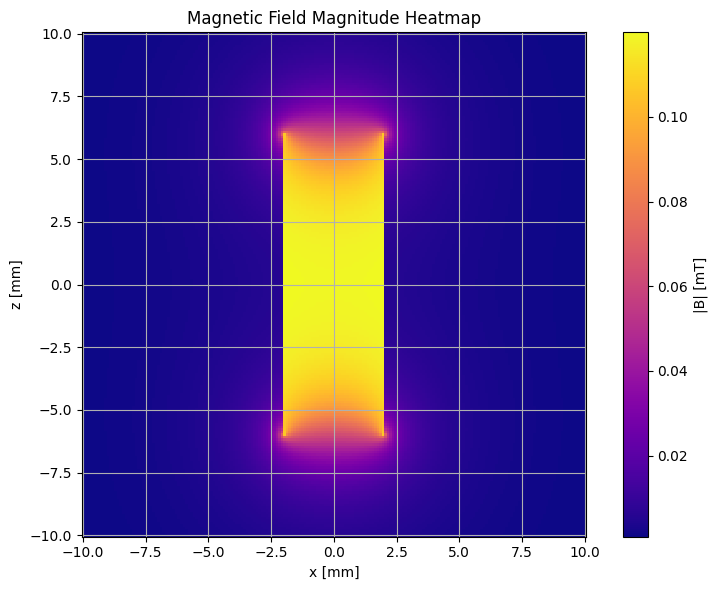

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Define magnet
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, 1e5),
    dimension=(4, 12)
)

# Grid in x-z plane
x = np.linspace(-10, 10, 200)
z = np.linspace(-10, 10, 200)
X, Z = np.meshgrid(x, z)
positions = np.stack((X.ravel(), np.zeros_like(X.ravel()), Z.ravel()), axis=1)

# Compute B field and magnitude
B = magnet.getB(positions)
B_mag = np.linalg.norm(B, axis=1).reshape(X.shape)  # magnitude in mT

# Plot heatmap-
plt.figure(figsize=(8, 6))
hm = plt.pcolormesh(X, Z, B_mag, shading='auto', cmap='plasma')
plt.colorbar(hm, label='|B| [mT]')
plt.title('Magnetic Field Magnitude Heatmap')
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

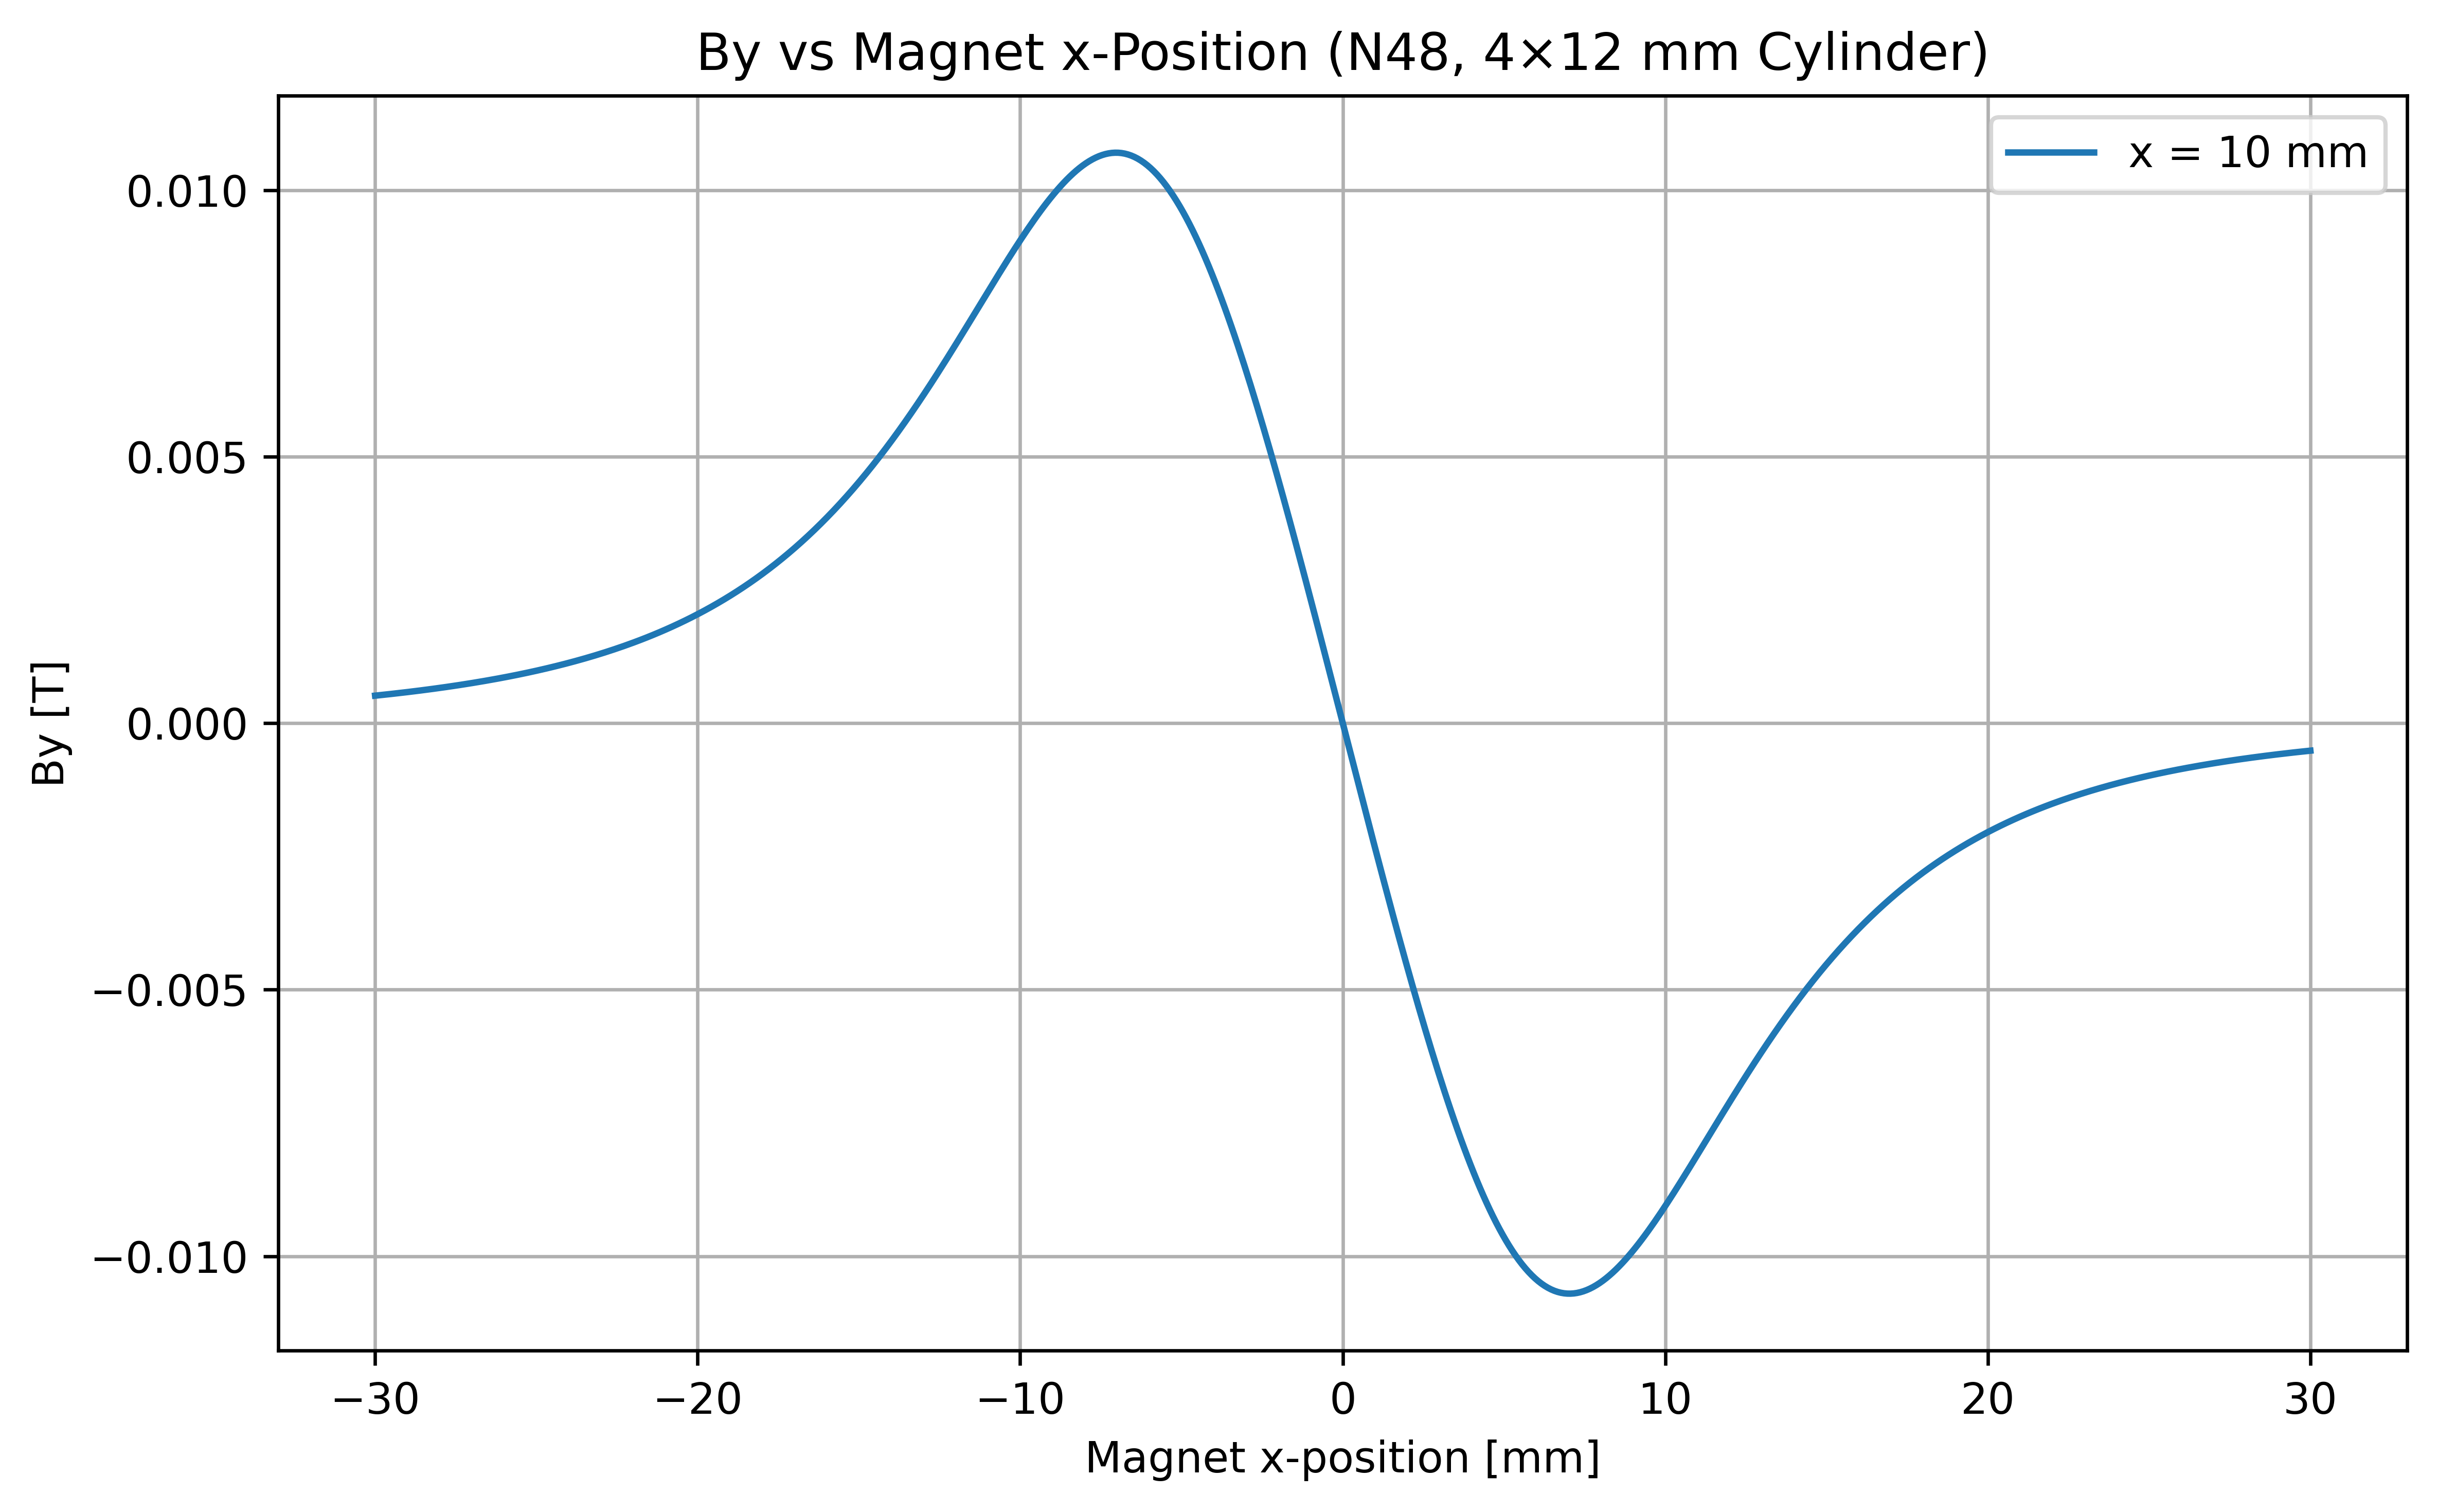

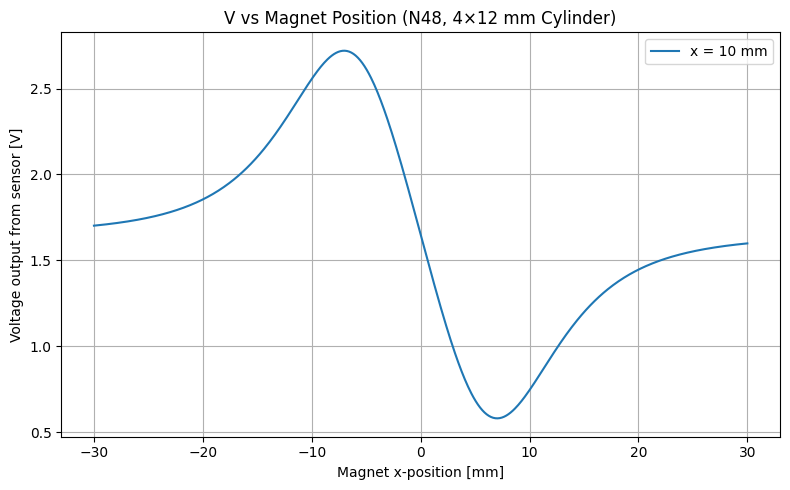

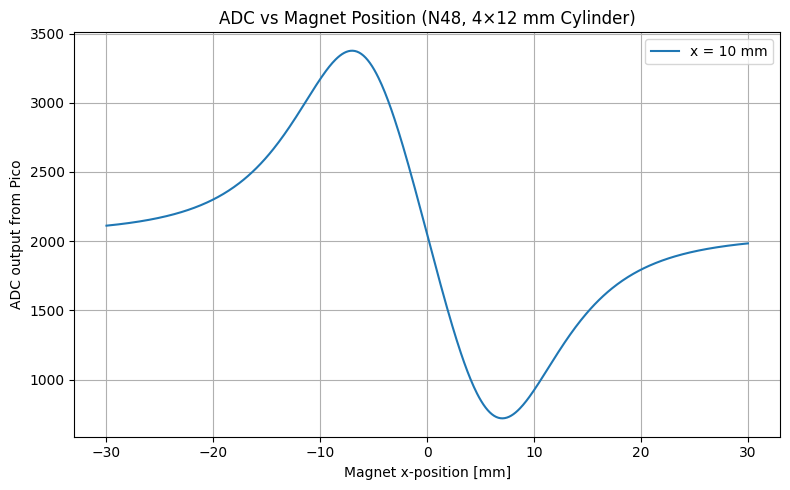

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Magnetization for N42 grade neodymium
Br = 1.38  # Tesla
mu0 = 4 * np.pi * 1e-7  # H/m
M = Br / mu0  # Magnetization in A/m for axial magnetization
# => ~1.035e6 A/m

# --- Configuration ---
x_sensor = 10  # mm offset from magnet center
z_sensor = 0 # mm offset from magnet center
z_range = np.linspace(-30, 30, 600)  # magnet Z positions (mm)
sensor_pos = np.array([x_sensor, 0, z_sensor])  # fixed target position

# --- Define magnet ---
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, M),  # axial (z-direction)
    dimension=(4, 12)  # diameter, height in mm
)

# --- Sweep and record Bz ---
Bx_values = []
V_values = []
ADC_values = []
for z_mag in z_range:
    magnet.position = (0, 0, z_mag)  # move along z
    B = magnet.getB(sensor_pos)  # mT
    Bx_values.append(B[0])
    V_values.append(B[0] * 100 + 3.3 / 2)  # convert to Tesla for voltage calculation
    ADC_values.append((B[0] * 100 + 3.3 / 2) / (3.3 / 4096))  # convert to ADC value

# --- Plot ---
plt.figure(figsize=(8, 5), dpi=600)
plt.plot(z_range, Bx_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('By vs Magnet x-Position (N48, 4×12 mm Cylinder)')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('By [T]')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5), dpi=600)
plt.plot(z_range, V_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('V vs Magnet Position (N48, 4×12 mm Cylinder)')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('Voltage output from sensor [V]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(z_range, ADC_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('ADC vs Magnet Position (N48, 4×12 mm Cylinder)')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('ADC output from Pico')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

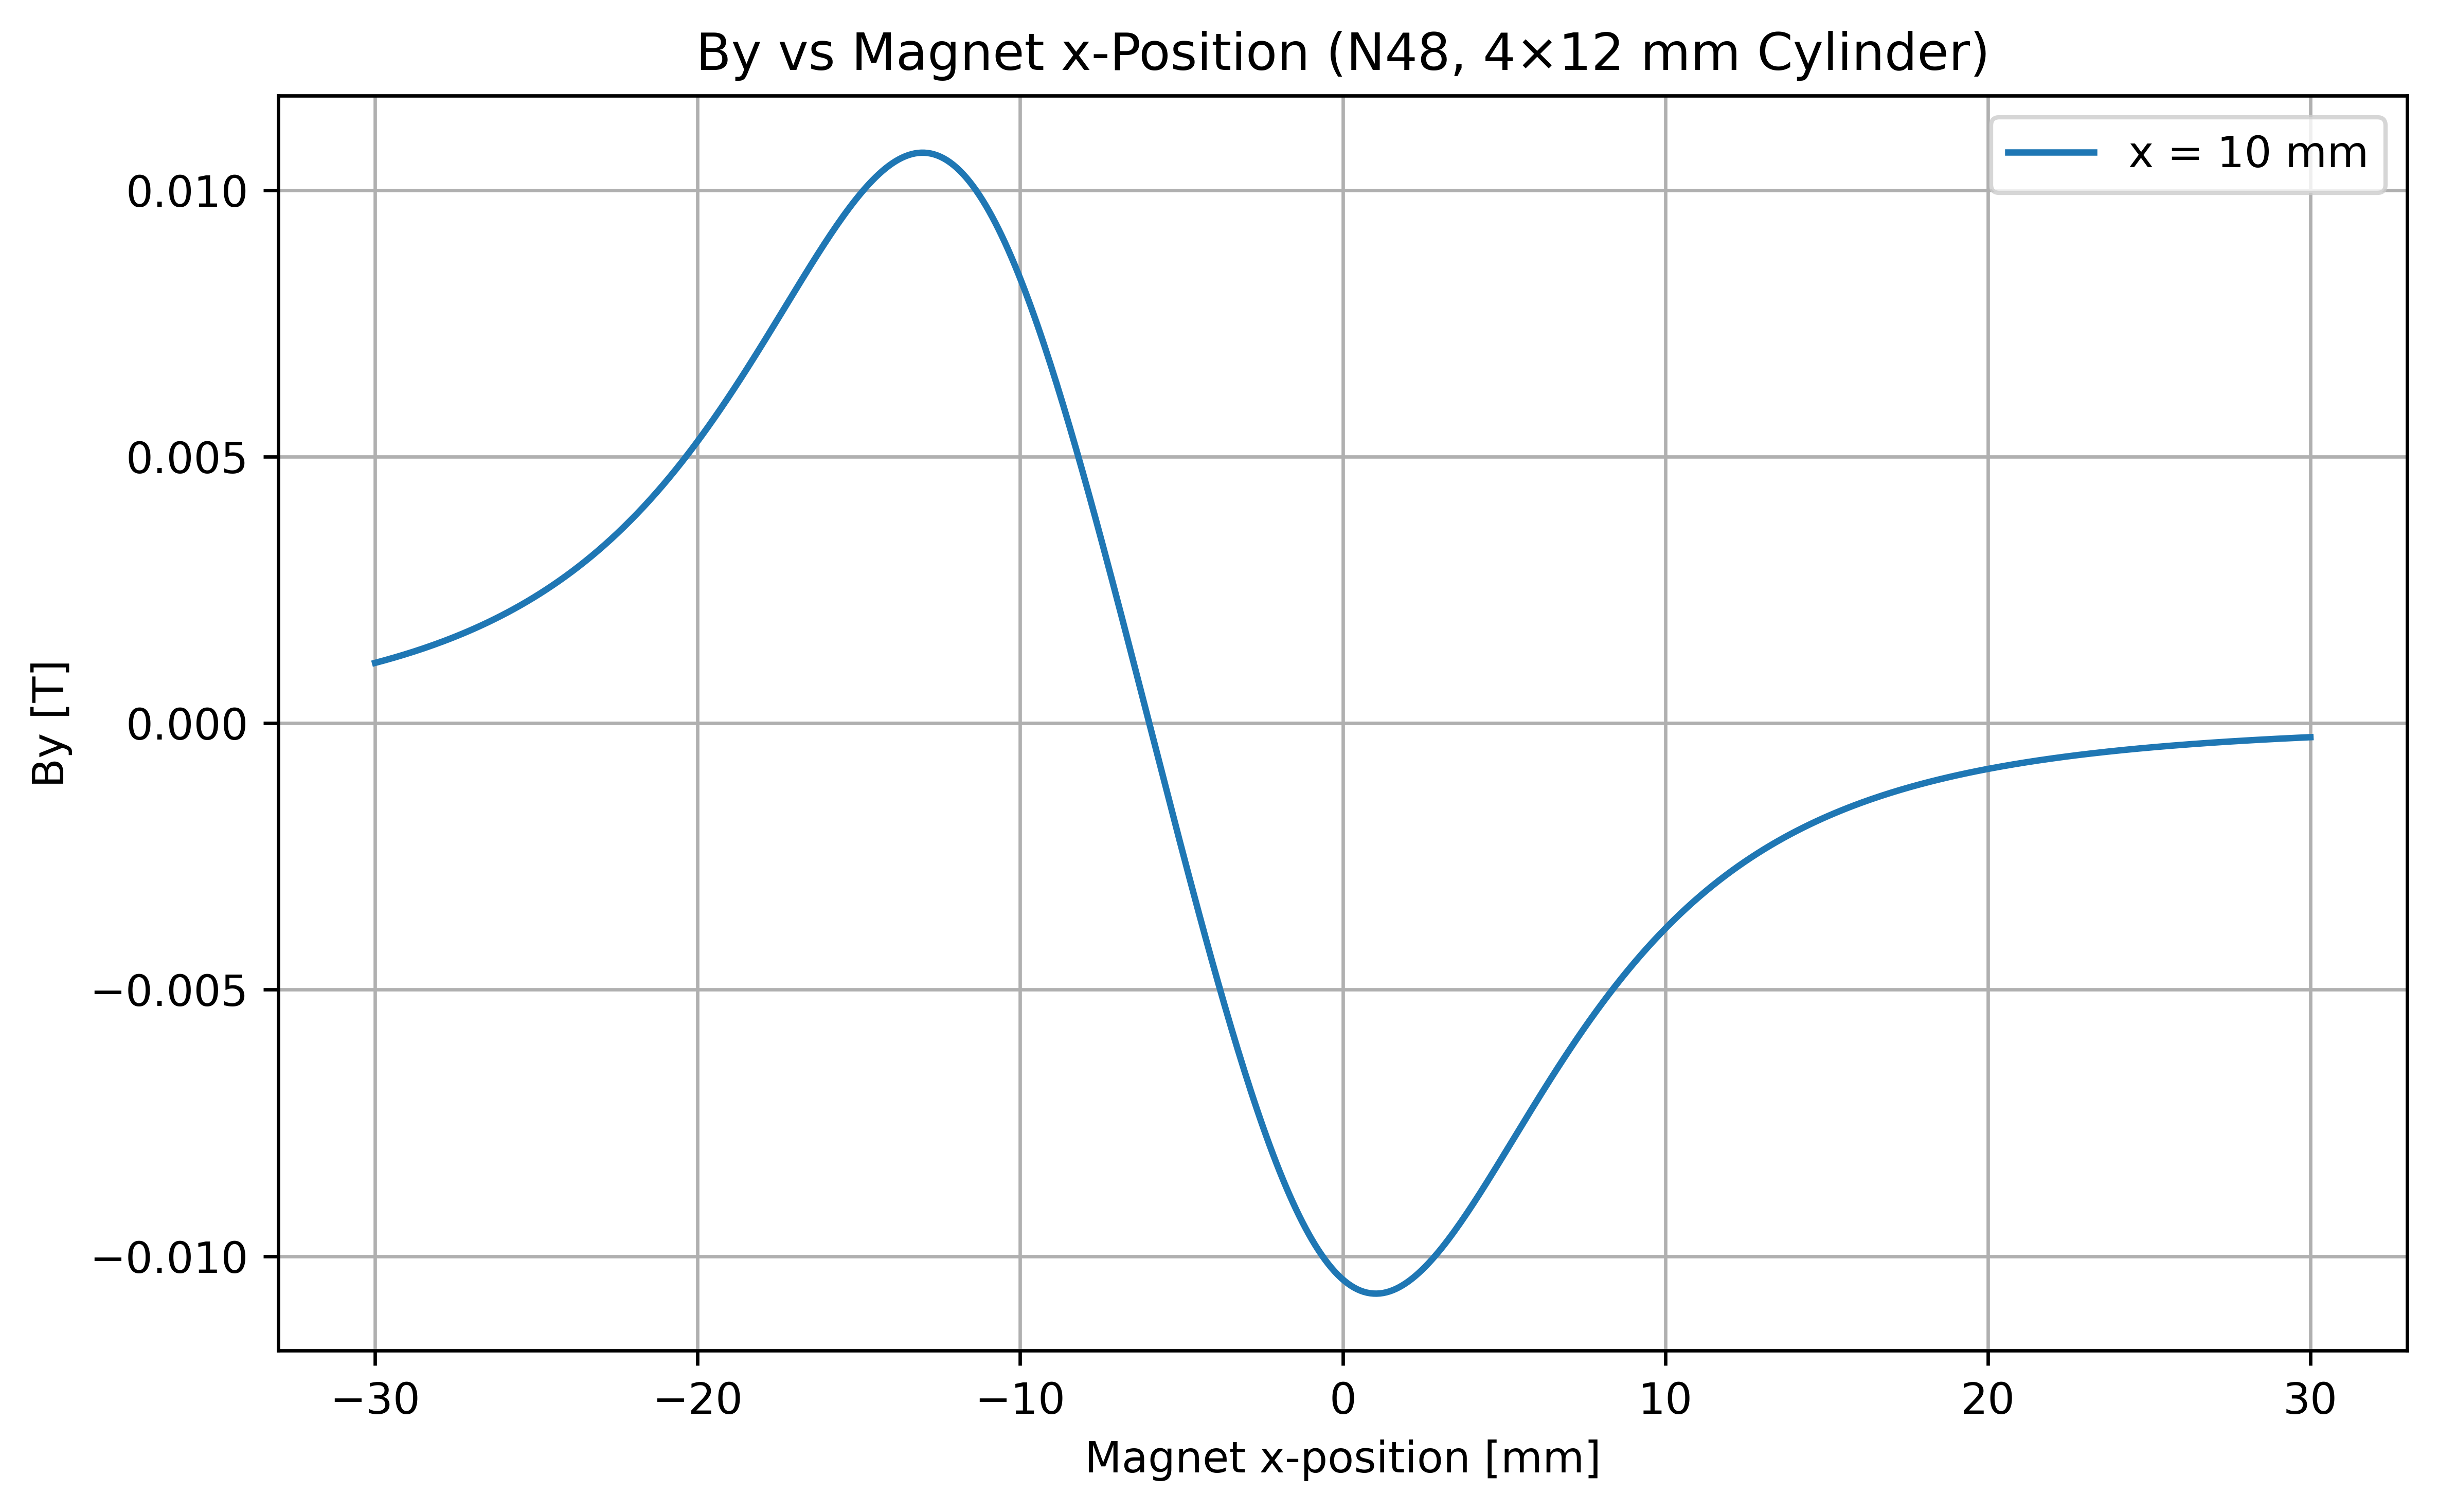

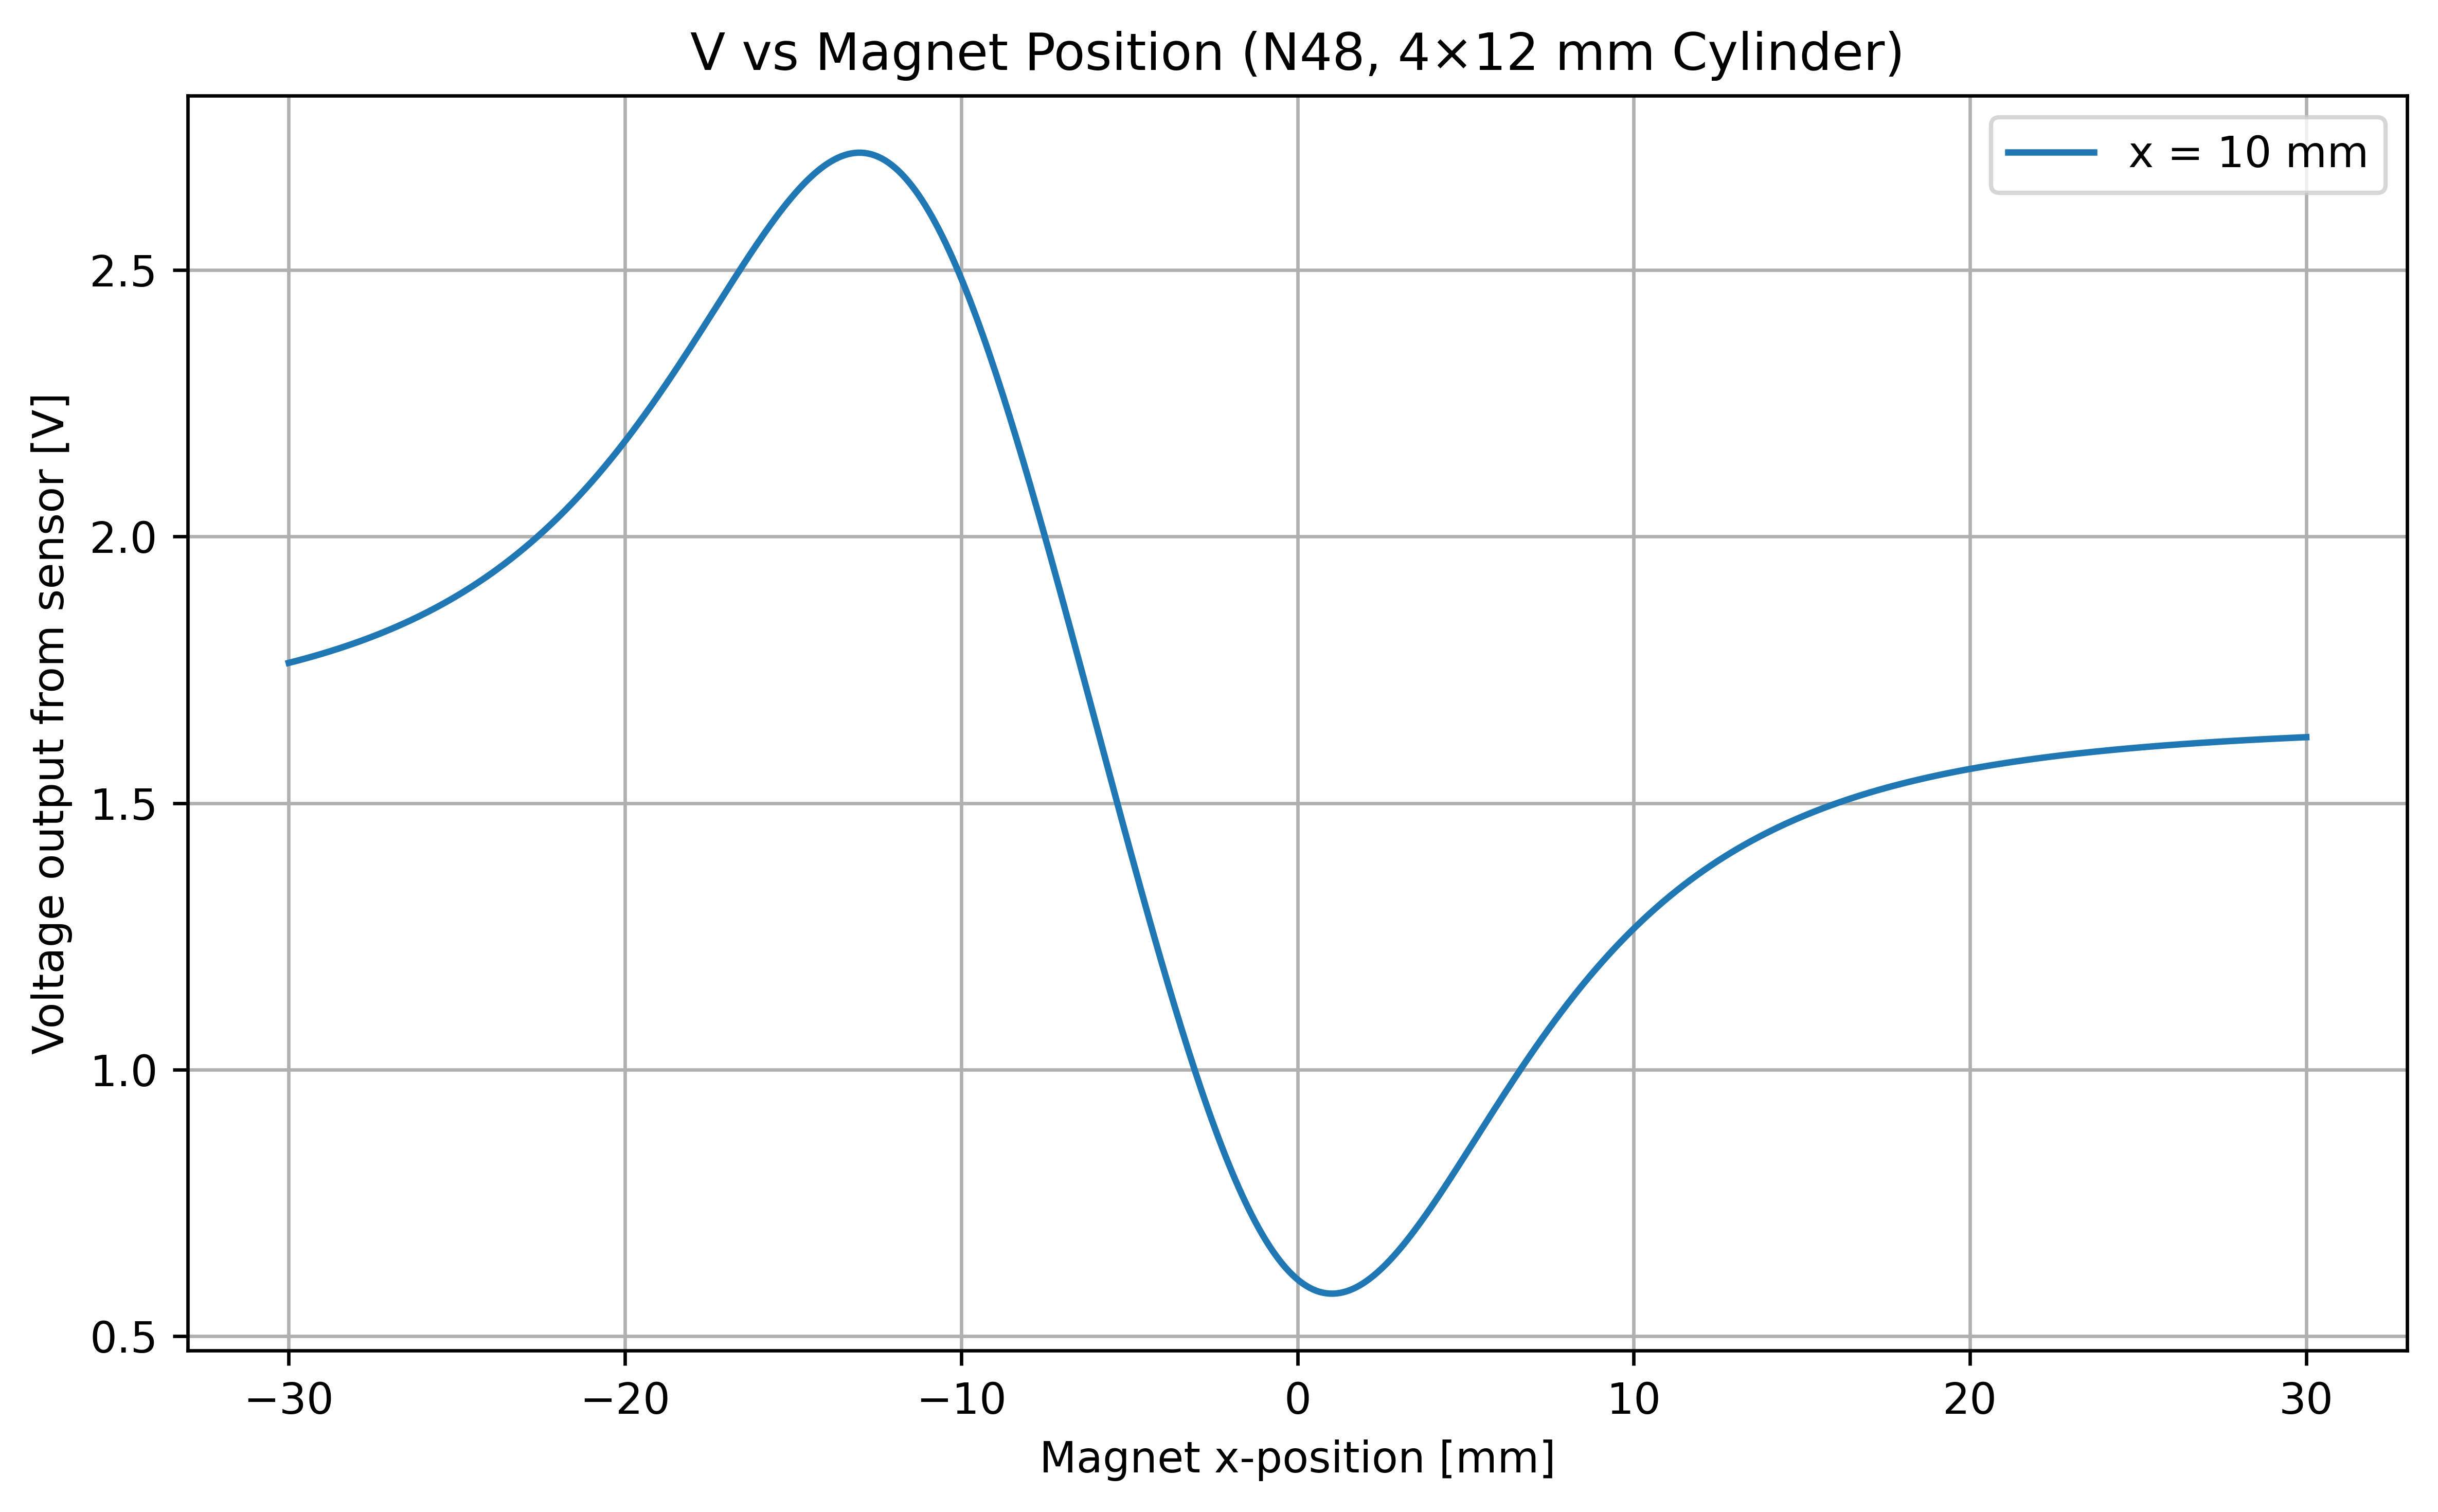

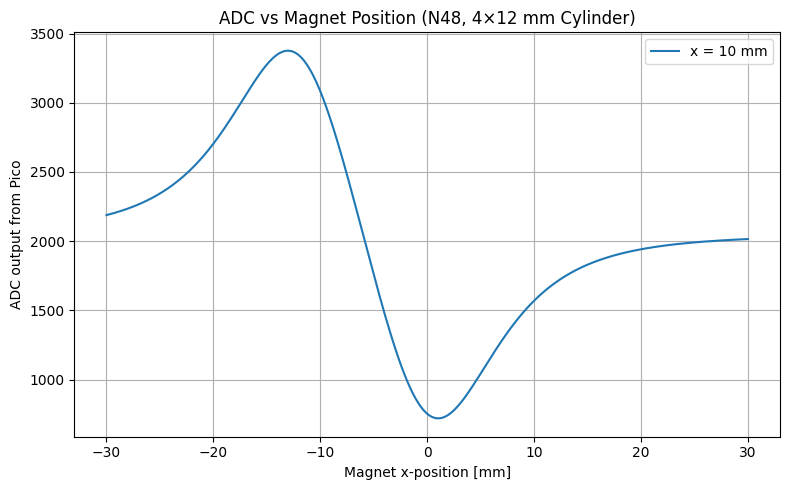

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Magnetization for N42 grade neodymium
Br = 1.38  # Tesla
mu0 = 4 * np.pi * 1e-7  # H/m
M = Br / mu0  # Magnetization in A/m for axial magnetization
# => ~1.035e6 A/m

# --- Configuration ---
x_sensor = 10  # mm offset from magnet center
z_sensor = 0 # mm offset from magnet center
z_range = np.linspace(-30, 30, 600)  # magnet Z positions (mm)
sensor_pos = np.array([x_sensor, 0, z_sensor])  # fixed target position

# --- Define magnet ---
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, M),  # axial (z-direction)
    dimension=(4, 12)  # diameter, height in mm
)

# --- Sweep and record Bz ---
Bx_values = []
V_values = []
ADC_values = []
for z_mag in z_range:
    magnet.position = (0, 0, z_mag)  # move along z
    B = magnet.getB(sensor_pos)  # mT
    Bx_values.append(B[0])
    V_values.append(B[0] * 100 + 3.3 / 2)  # convert to Tesla for voltage calculation
    ADC_values.append((B[0] * 100 + 3.3 / 2) / (3.3 / 4096))  # convert to ADC value

# --- Plot ---
plt.figure(figsize=(8, 5), dpi=600)
plt.plot(z_range, Bx_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('By vs Magnet x-Position (N48, 4×12 mm Cylinder)')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('By [T]')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5), dpi=600)
plt.plot(z_range, V_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('V vs Magnet Position (N48, 4×12 mm Cylinder)')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('Voltage output from sensor [V]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(z_range, ADC_values, label=f'x = {x_sensor} mm', color='C0')
plt.title('ADC vs Magnet Position (N48, 4×12 mm Cylinder)')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('ADC output from Pico')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

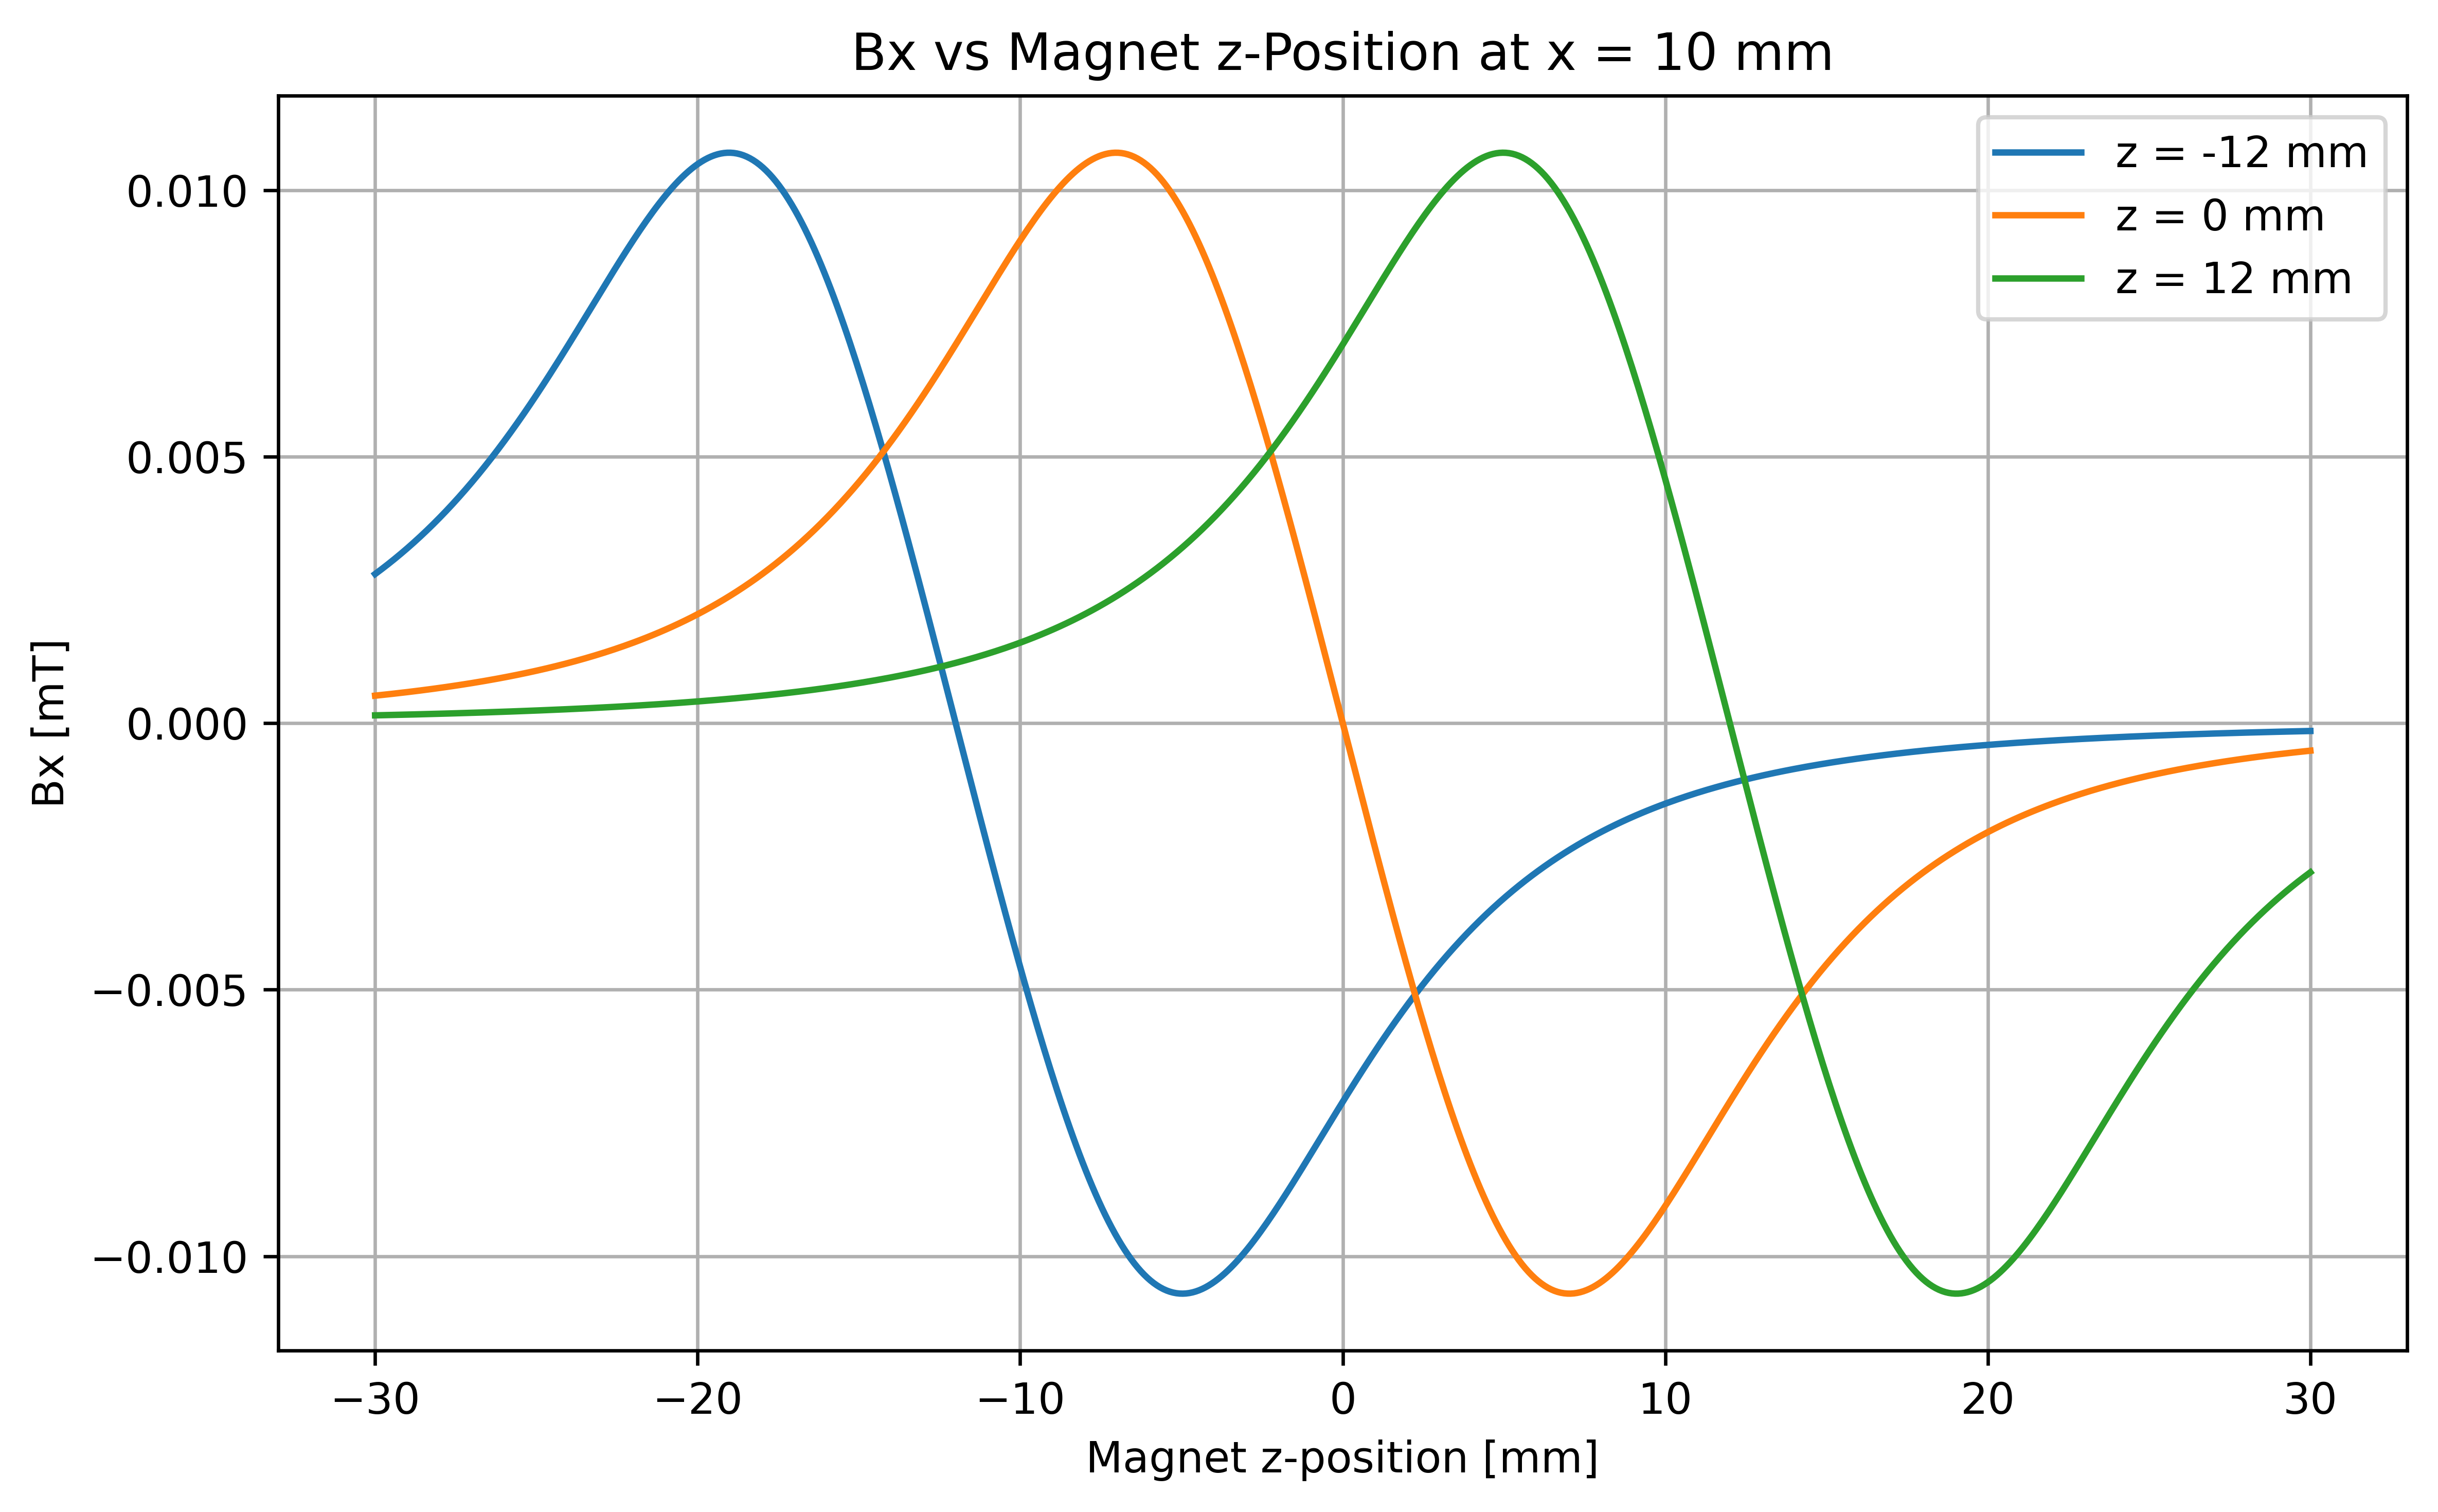

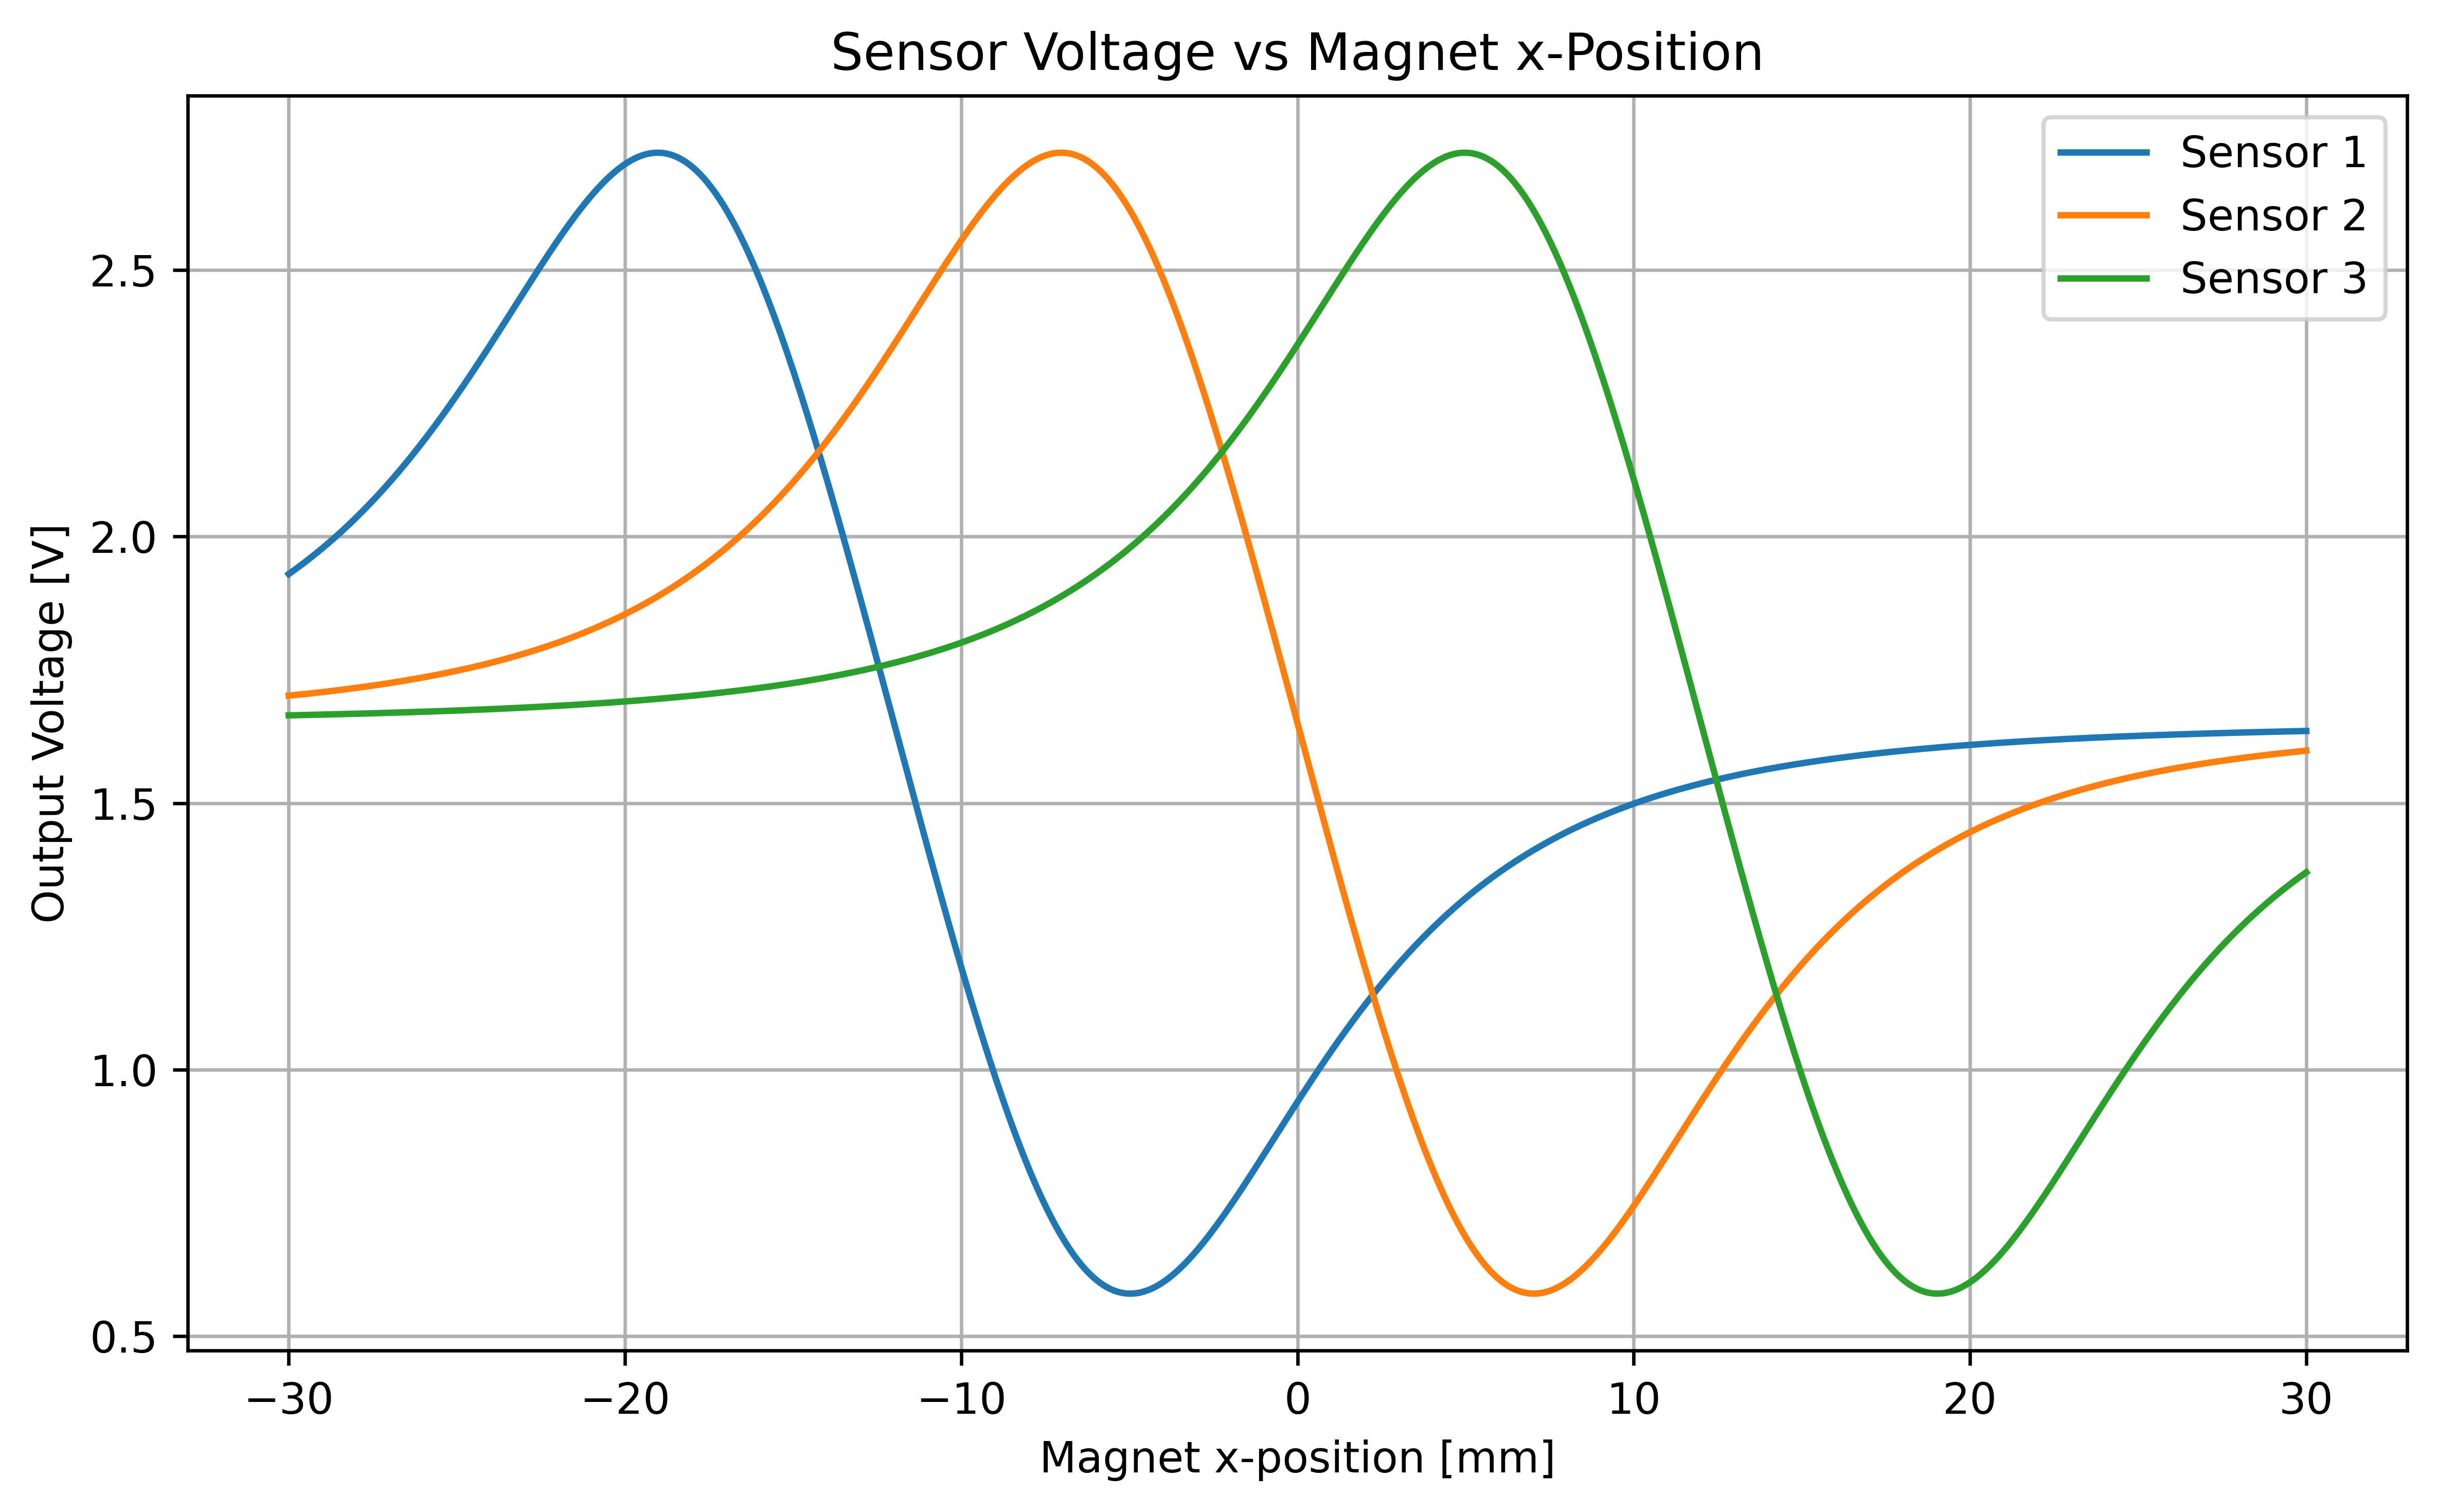

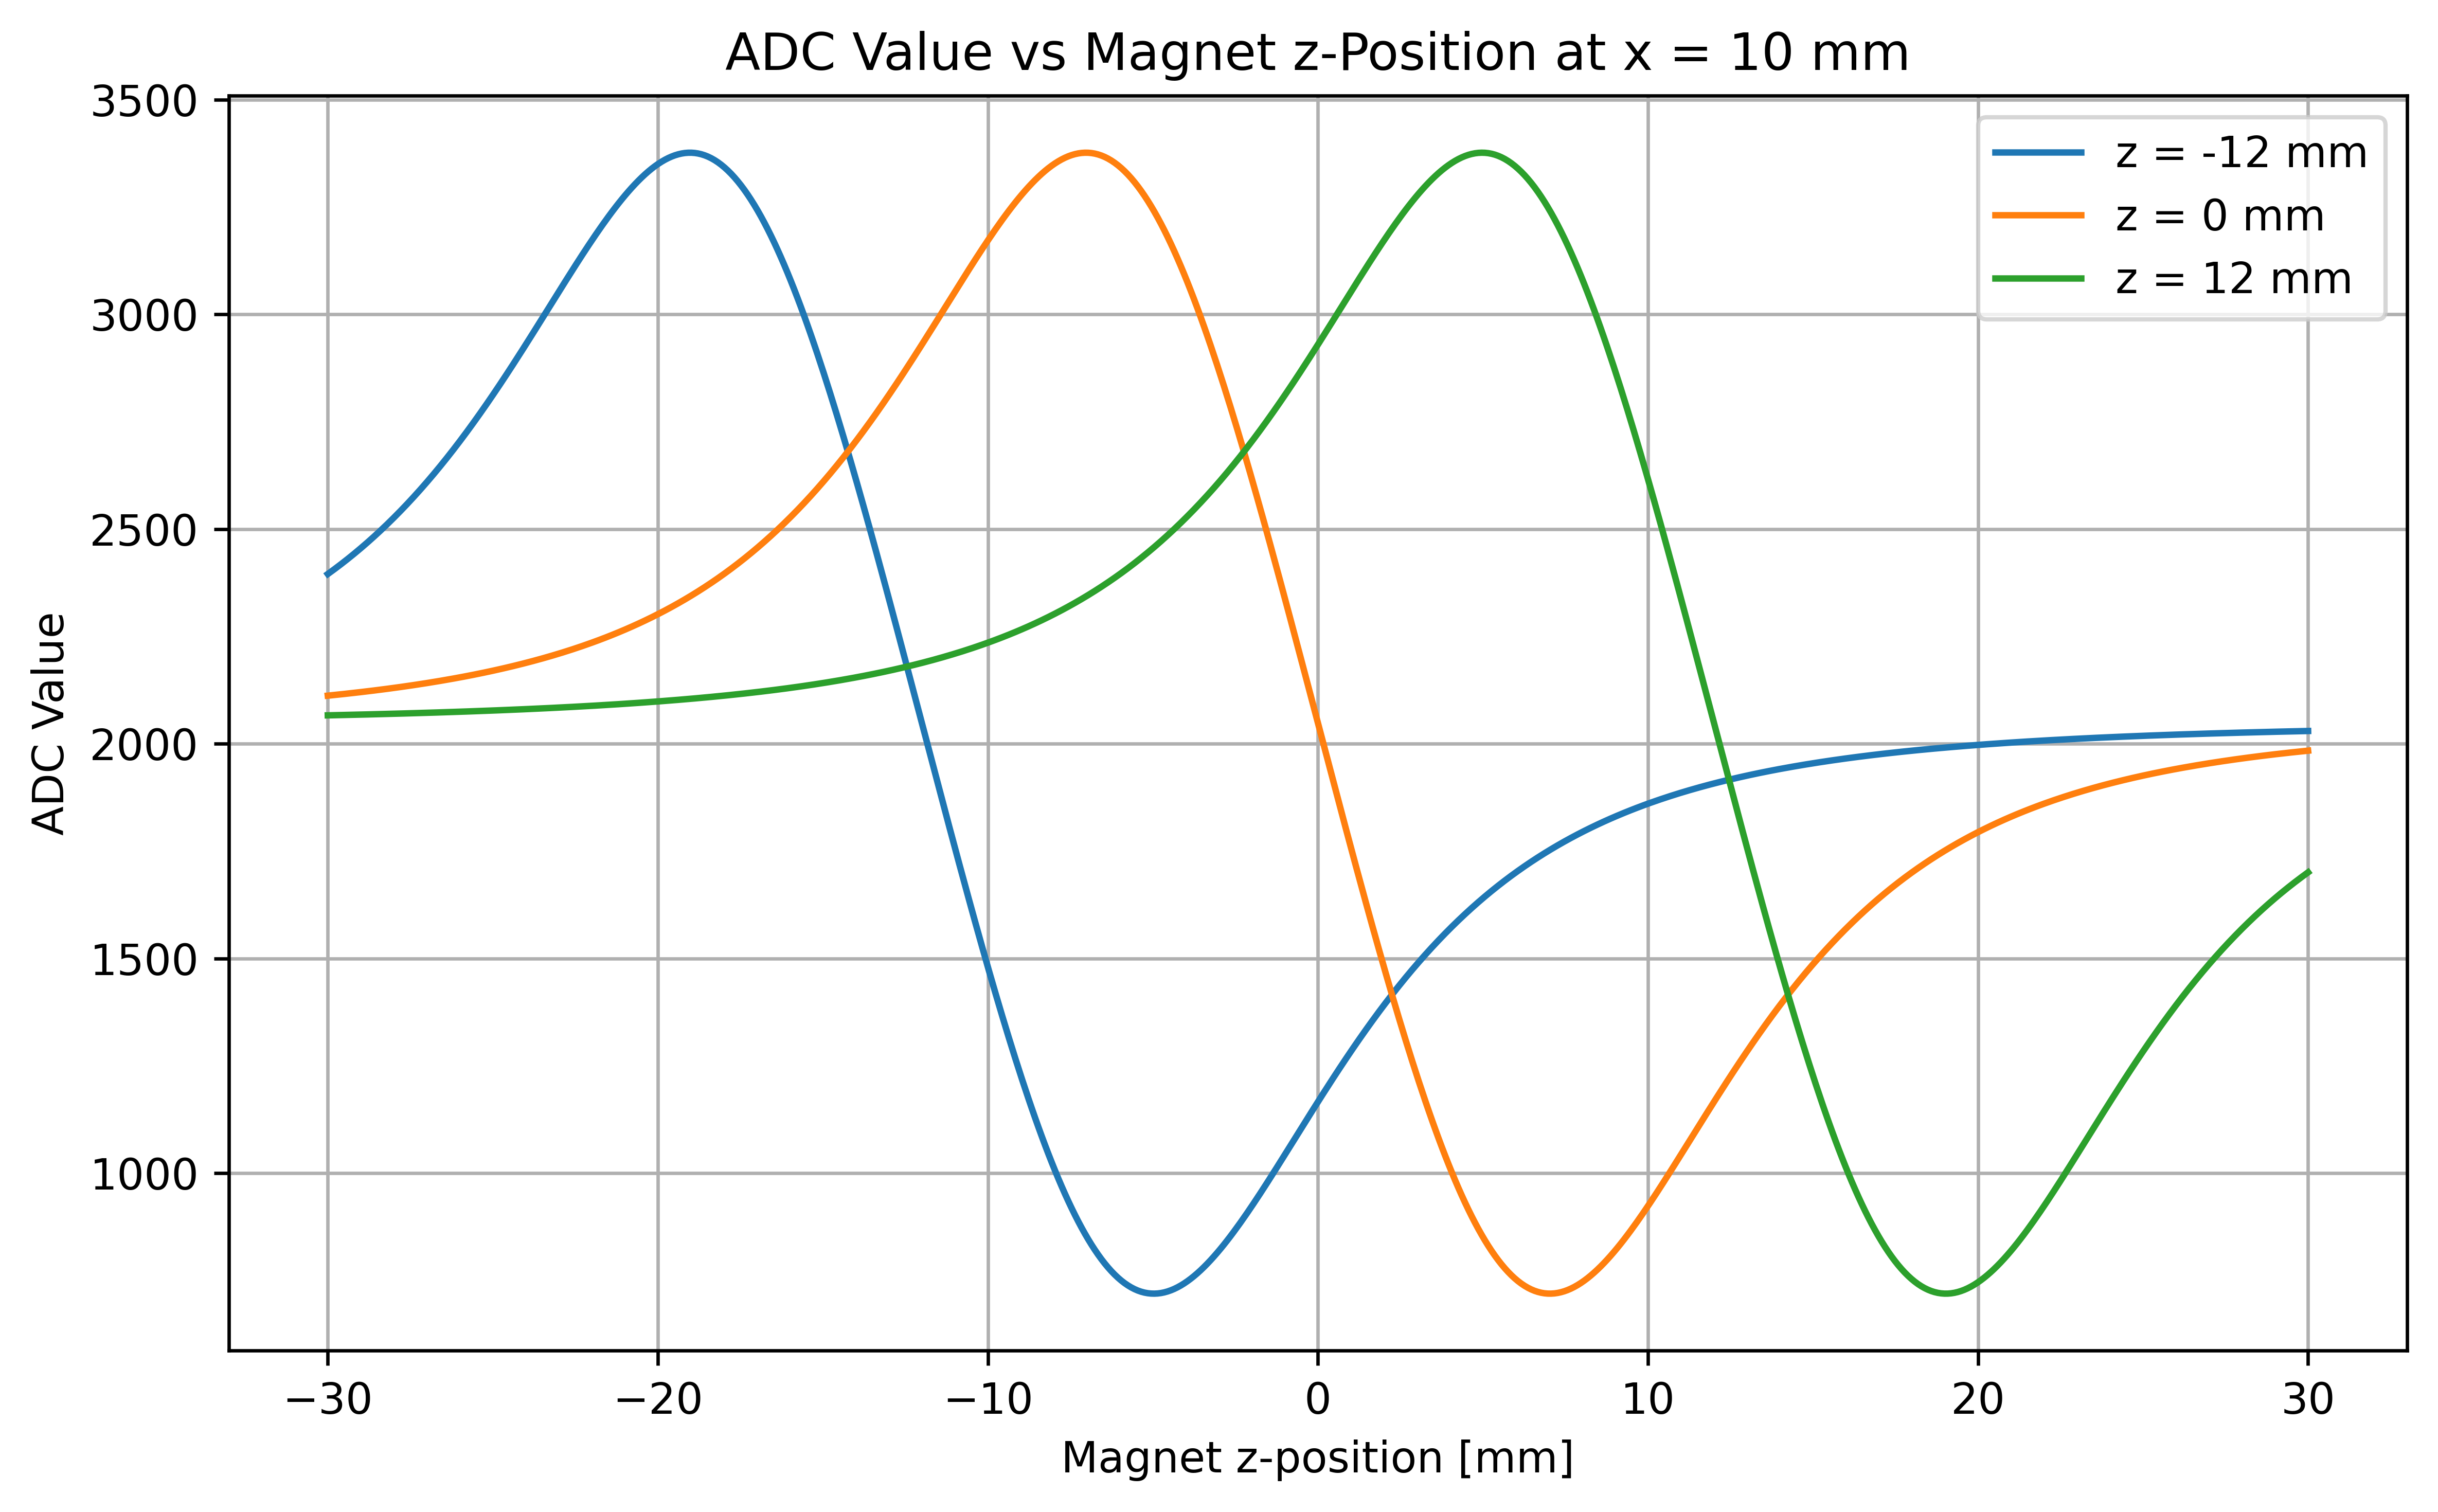

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag

# Magnetization for N48 grade neodymium
Br = 1.38  # Tesla
mu0 = 4 * np.pi * 1e-7  # H/m
M = Br / mu0  # Magnetization in A/m

# --- Configuration ---
x_sensor = 10  # mm fixed offset from magnet center
z_sensors = [-12, 0, 12]  # z positions of each sensor
z_range = np.linspace(-30, 30, 600)  # magnet Z positions (mm)

# --- Define magnet ---
magnet = mag.magnet.Cylinder(
    magnetization=(0, 0, M),  # axial (z-direction)
    dimension=(4, 12)  # diameter, height in mm
)

# --- Storage for results ---
results = {z: {"Bx": [], "V": [], "ADC": []} for z in z_sensors}

# --- Sweep magnet and record fields for each sensor ---
for z_mag in z_range:
    magnet.position = (0, 0, z_mag)
    for z_sensor in z_sensors:
        sensor_pos = np.array([x_sensor, 0, z_sensor])
        B = magnet.getB(sensor_pos)  # mT
        Bx = B[0]
        V = Bx * 100 + 3.3 / 2
        ADC = V / (3.3 / 4096)

        results[z_sensor]["Bx"].append(Bx)
        results[z_sensor]["V"].append(V)
        results[z_sensor]["ADC"].append(ADC)

# --- Plot Bx vs magnet position ---
plt.figure(figsize=(8, 5), dpi=600)
for z_sensor in z_sensors:
    plt.plot(z_range, results[z_sensor]["Bx"], label=f'z = {z_sensor} mm')
plt.title('Bx vs Magnet z-Position at x = 10 mm')
plt.xlabel('Magnet z-position [mm]')
plt.ylabel('Bx [mT]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot Voltage vs magnet position ---
plt.figure(figsize=(8, 5), dpi=600)
for z_sensor in z_sensors:
    plt.plot(z_range, results[z_sensor]["V"], label=f'Sensor {int(z_sensor/12 + 2)}')
plt.title('Sensor Voltage vs Magnet x-Position')
plt.xlabel('Magnet x-position [mm]')
plt.ylabel('Output Voltage [V]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot ADC vs magnet position ---
plt.figure(figsize=(8, 5), dpi=600)
for z_sensor in z_sensors:
    plt.plot(z_range, results[z_sensor]["ADC"], label=f'z = {z_sensor} mm')
plt.title('ADC Value vs Magnet z-Position at x = 10 mm')
plt.xlabel('Magnet z-position [mm]')
plt.ylabel('ADC Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()